In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from modules.experiment._shared import EXP_DATA_DIR
from modules.plots._shared import Figsize, _save_or_show

from modules_reloader import reloader
relmod = reloader()

ModuleNotFoundError: No module named 'modules'

In [3]:
ham_qe = np.loadtxt(EXP_DATA_DIR / 'HamamatsuR3886.quanteff')
feu84_qe = np.loadtxt(EXP_DATA_DIR / 'FEU84-3.quanteff').T

In [4]:
ham_max_qe = 0.2418
feu_max_qe = 0.177

ham_qe[:, 1] = ham_max_qe * ham_qe[:, 1] / np.max(ham_qe[:, 1])
feu84_qe[:, 1] = feu_max_qe * feu84_qe[:, 1] / np.max(feu84_qe[:, 1])

In [5]:
hc = 1.24 * 10 ** 3  # nm * eV

def wavelength2energy(lmb):
    return hc / lmb

def energy2wavelength(e):
    return hc / e

In [6]:
feu84_qe[:, 0] = wavelength2energy(feu84_qe[:, 0])
ham_qe[:, 0] = wavelength2energy(ham_qe[:, 0])

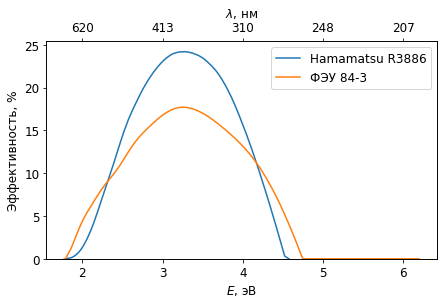

In [11]:
fig, ax = plt.subplots(figsize=Figsize.SMALL_HORIZ.value)
ax2 = ax.twiny()

ax.plot(ham_qe[:, 0], 100*ham_qe[:, 1], label='Hamamatsu R3886')
ax.plot(feu84_qe[:, 0], 100*feu84_qe[:, 1], label='ФЭУ 84-3')

ax2.set_xticks(ax.get_xticks())
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(
    [
        f"{lmb:.0f}" for lmb in energy2wavelength(ax.get_xticks())
    ]
)

# ax.set_yscale('log')
ax.set_ylim(bottom=0)
ax.set_xlabel('$E$, эВ')
ax2.set_xlabel('$\\lambda$, нм')
ax.set_ylabel('Эффективность, %')

ax.legend()

# _save_or_show('pmt-quantum-efficiences')

$Q(x, y) = \frac{n_{ph. el.}}{\Delta E \; \bar{\kappa}} $

In [22]:
ham_n2Q_factor = 1 / (np.mean(ham_qe[:, 1]) * (ham_qe[0, 0] - ham_qe[-1, 0]))
print(ham_n2Q_factor)

2.943031538444593


In [24]:
feu_n2Q_factor = 1 / (np.mean(feu84_qe[:, 1]) * (feu84_qe[0, 0] - feu84_qe[-1, 0]))
print(feu_n2Q_factor)

2.5745613410569366
